<a href="https://colab.research.google.com/github/mboya2020/Image-Classification-with-CNN/blob/main/Image_Classification_with_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IMAGE CLASSIFICATION WITH DEEP LEARNING

## 1. Business understanding


### 1.1 Data Analytic Question & Problem Statement

Tibabu hospital has observed an increase in Pneumonia infections. The hospital is understaffed, and cannot keep up with the high volume of patients. They approached Avengers LTD for a solution to help with the diagnosis. So to improve diagnosis of pneumonia using x-rays, tasked Avengers to come up with a solution.



### 1.2 Problem Context
Pneumonia is a serious lung condition that can be brought on by bacteria, viruses, or fungus. When someone has pneumonia, the alveoli (air sacs) are filled with fluid and pus, which makes breathing unpleasant, difficult, and restricts oxygen intake (reduced oxygen saturation).
According to the WHO, pneumonia caused 14% of all deaths among children under the age of five in 2019. Both young people and the elderly are susceptible.
A patient's clinical examination is used to diagnose pneumonia.

Machine learning in healthcare reduces the possibility of doing an improper examination. Therefore, Tibabu Hospital would like to put into practice a methodology that would enable them to detect pneumonia more precisely utilizing chest X-ray pictures. As a machine learning algorithm would sift through a vast amount of data to learn the most likely diagnosis, this would give patients more confidence in the diagnosis.


### 1.3 Metric of Success

The algorithm will be considered a success if the predictions made by it have a:

- Precision above 92% 
- Recall above 95%
- Accuracy of 90% - 96%

The task is to build a model that can classify whether a given patient has pneumonia given  their chest x-ray image. 

Since this is an Image Classification problem, Deep Learning is the ideal solving method.


## 2. Data Understanding

The medical dataset contains a set of x-ray images of pediatric patients. 
The images are of patients who have pneumonia and those who don't.

Chest X-ray images were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou, China. All chest X-ray imaging were performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

The final data is in two classes, Normal and Pneumonia. This dataset was downloaded from [Kaggle](https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia). The data was further divided into three folders of  train, test and validation, each with two classes; normal and pneumonia.




## 3. Project Plan

1. Load and Pre-process the data.
2. Define the trained generator, validation generator, and test generator.
3. Build a baseline model.
4. Tune iterative models.
5. Challenge the solution with Transfer Learning . 
6. Evaluate the model with the test images.

## 4. Loading the Data

### 4.1 Loading the Libraries

Connecting to Google drive and Importing all the necessary Libraries | Modules.

In [ ]:
# connecting collab to google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import all relevant libraries

import numpy as np 
import os, shutil

import time

import seaborn as sns  
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow.keras import optimizers, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.applications import VGG19, MobileNet, resnet50
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator, \
                                                  array_to_img
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, MaxPooling2D,\
                               Conv2D, Flatten, Activation, Dropout, Rescaling

import keras
from keras.callbacks import ReduceLROnPlateau , ModelCheckpoint


### 4.2 Loading the Data

The data was loaded using `os.listdir` method

In [ ]:
# printing the contents of the chest_xray folder 

print(os.listdir('/content/drive/Shareddrives/Avengers/chest_xray'))

['test', 'val', 'train']


Stored the data for both normal and pneumonia x-ray images into variables for easy access. 

This was done for both the train and test data.

In [ ]:
# storing the directory paths as variables

train_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/NORMAL'
train_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train/PNEUMONIA'

test_norm_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/NORMAL'
test_pneu_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test/PNEUMONIA'

A list of images in the directories was then created.

In [ ]:
# store train normal xrays and pneumonia xrays as variables.

train_norm_images = os.listdir(train_norm_dir)
train_pneu_images = os.listdir(train_pneu_dir)

# store train normal xrays and pneumonia x-rays as variables.

test_norm_images = os.listdir(test_norm_dir)
test_pneu_images = os.listdir(test_pneu_dir)

### 4.3 Previewing the data

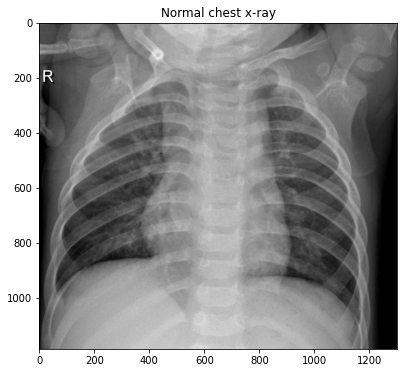

In [ ]:
# Display an image from the train NORMAL folder.


img_name_normal = '/' + train_norm_images[3]
normal_lung = load_img(train_norm_dir + img_name_normal)

# normal chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(normal_lung)
plt.title('Normal chest x-ray')

plt.show()

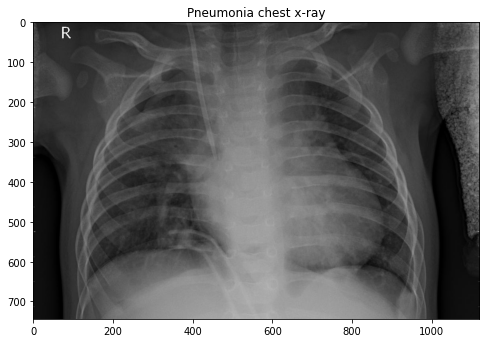

In [ ]:
# Display an image from the train PNEUMONIA folder.

img_name_pneumonia = '/' + train_pneu_images[3]
pneumonia_lung = load_img(train_pneu_dir + img_name_pneumonia)

# pneumonia chest x-ray
plt.figure(figsize=(8, 6))
plt.imshow(pneumonia_lung)
plt.title('Pneumonia chest x-ray')

plt.show()

## 5. Exploring the Data

Plotted the class distributions to further understand the data.

### 5.1 Training Set

In [ ]:
# combining all the training data

total_train = train_norm_images + train_pneu_images
print('Total train data size is:', np.shape(total_train)[0])

Total train data size is: 5226


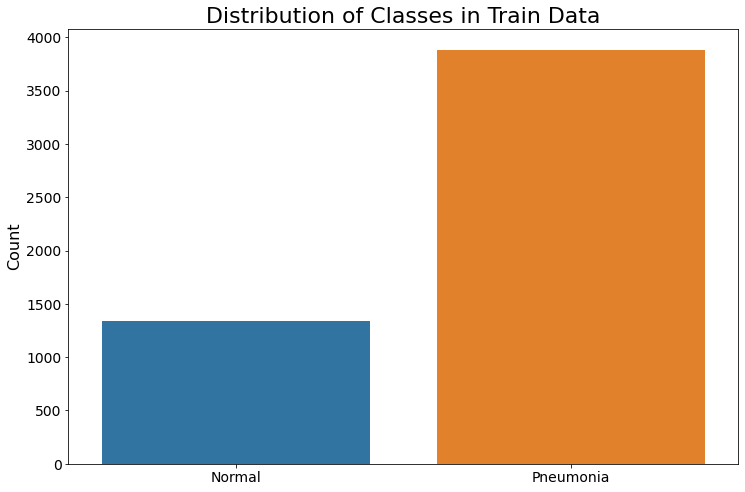


Total count of normal chest x-rays: 1341
----------------------------------------------------------------------------------
Total count of pneumonia chest x-rays: 3885


In [ ]:
# creating countplot for total_counts_train

total_counts_train = []
pneu_len_train = 0
norm_len_train = 0

for i in total_train:
    if i[0] == 'p':
        total_counts_train.append('Pneumonia')
        pneu_len_train += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_train.append('Normal')
        norm_len_train += 1

plt.figure(figsize=(12, 8))

title_font_dict = {'size': 22}
labels_font_dict = {'size': 16}

sns.countplot(x=total_counts_train)

plt.ylabel('Count', labels_font_dict)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )

plt.title('Distribution of Classes in Train Data', title_font_dict)
plt.show()

print('\nTotal count of normal chest x-rays: {}'.format(norm_len_train))
print('----------------------------------------------------------------------------------')
print('Total count of pneumonia chest x-rays: {}'.format(pneu_len_train))

It can be noted that the training data is imbalanced at a ratio of ~ 1:3

### 5.2 Test Set

In [ ]:
# combining all the test data 

total_test = test_norm_images + test_pneu_images
print('Total test data size is:', np.shape(total_test)[0])

Total test data size is: 624


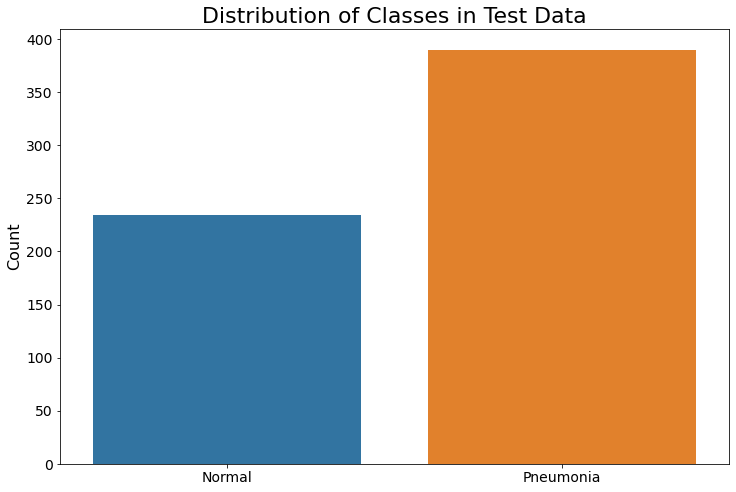


Total count of normal chest x-rays: 234
----------------------------------------------------------------------------------
Total count of pneumonia chest x-rays: 390


In [ ]:
# creating countplot for total_counts_test

total_counts_test= []
pneu_len_test = 0
norm_len_test = 0

for i in total_test:
    if i[0] == 'p':
        total_counts_test.append('Pneumonia')
        pneu_len_test += 1
    elif i[0] == 'N' or i[0] == 'I':
        total_counts_test.append('Normal')
        norm_len_test += 1
        
plt.figure(figsize=(12, 8))

sns.countplot(x=total_counts_test)

plt.ylabel('Count', labels_font_dict)
plt.xticks(fontsize = 14 )
plt.yticks(fontsize = 14 )

plt.title('Distribution of Classes in Test Data', title_font_dict)
plt.show()

print('\nTotal count of normal chest x-rays: {}'.format(norm_len_test))
print('----------------------------------------------------------------------------------')
print('Total count of pneumonia chest x-rays: {}'.format(pneu_len_test))

The test data has an imbalance of ratio ~ 1:2

## 6. Preprocessing

### 6.1 Reshaping and Normalizing the Data

Reshaping is important for pixel uniformity in the images, while normalization makes computations efficient by reducing values between 0 to 1. This will be achieved using the `ImageDataGenerator`.

In [ ]:
# store test and train directory paths as variables

train_dir = '/content/drive/Shareddrives/Avengers/chest_xray/train'
test_dir = '/content/drive/Shareddrives/Avengers/chest_xray/test'

In [ ]:
# setting some global variables

image_height = 156
image_width = 156

input_shape = (image_height, image_width, 3)

In [ ]:
# rescaling all images

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # this is the target directory for train data
        train_dir,
        # all images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_train),
        # using binary labels because target is binary
        class_mode = 'binary')

test_generator = test_datagen.flow_from_directory(
        # this is the target directory for test data
        test_dir,
        # all images will be resized to 156*156 pixels
        target_size = (image_height, image_width),
        batch_size = len(total_test),
        # using binary labelsbecause target is binary
        class_mode = 'binary')

Found 5226 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
# creating preprocessed datasets

train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)


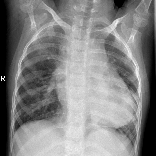

In [ ]:
# viewing an xray from the new dataset.

array_to_img(train_images[10])

In [ ]:
# viewing the labels

train_labels

array([0., 0., 1., ..., 1., 0., 1.], dtype=float32)

In [ ]:
# previewing shape of preprocessed data

print('The new train shape is:', train_images.shape)
print('The new test shape is:', test_images.shape)

The new train shape is: (5226, 156, 156, 3)
The new test shape is: (624, 156, 156, 3)


In [ ]:
# identifying normal and pneumonia label notations

train_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
# defining the number of classes 

num_classes = 1

## 7. Implementing the Solution

The identified solution to the problem statement is modelling the given data. Given that this is an image classification problem, Convolutional Neural Networks (CNN) would be ideal as they have better performance compared to other neural networks.

In [ ]:
def plotting_visualizations(fitted_model):
    """
    Takes in a fitted model and returns a plot of all scores used in said model.
    """

    fig, ax = plt.subplots(2, 2, figsize=(20, 14))
    ax = ax.ravel()

    for i, score in enumerate(['precision', 'recall', 'accuracy', 'loss']):
        # Plot for train scores
        ax[i].plot(fitted_model.history[score])
        # plot for val/test scores
        ax[i].plot(fitted_model.history['val_' + score])

        ax[i].set_title('Model {}'.format(score).title(), title_font_dict)
        ax[i].set_xlabel('Epochs', labels_font_dict)
        ax[i].set_ylabel(score, labels_font_dict)
        ax[i].set_ylim(0)
        ax[i].legend(['train', 'val']) 


### 7.1 Baseline Model

In [ ]:
# instantiating a baseline model

baseline_model = Sequential()

In [ ]:
# adding layers to the baseline model

baseline_model.add(Input(shape = input_shape))

baseline_model.add(Conv2D(32, (3, 3), activation='relu'))
baseline_model.add(MaxPooling2D(pool_size=(2, 2)))

baseline_model.add(Flatten())
baseline_model.add(Dense(64, activation='relu'))

baseline_model.add(Dense(num_classes, activation='sigmoid'))

In [ ]:
# compiling the baseline model

baseline_model.compile(optimizer ='adam',
                       loss = "binary_crossentropy",
                       metrics = [tf.keras.metrics.Recall(name = 'recall'), 
                                  tf.keras.metrics.Precision(name = 'precision'), 
                                  'accuracy']
                       )


In [ ]:
# fit baseline model

base_start = time.time()

base_result = baseline_model.fit(train_images, 
                                 train_labels, 
                                 epochs = 10, 
                                 batch_size = 32, 
                                 validation_split = 0.2 
                                 )

base_stop = time.time()
print(f'Time taken to fit the baseline model was {round(base_stop - base_start, 3)} seconds')

Epoch 1/10
131/131 [==============================] - 3s 25ms/step - loss: 0.0032 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 0.0743 - val_recall: 0.9831 - val_precision: 0.9805 - val_accuracy: 0.9732
Epoch 2/10
131/131 [==============================] - 3s 22ms/step - loss: 0.0016 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 0.0770 - val_recall: 0.9857 - val_precision: 0.9793 - val_accuracy: 0.9742
Epoch 3/10
131/131 [==============================] - 3s 22ms/step - loss: 0.0014 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 0.0770 - val_recall: 0.9805 - val_precision: 0.9818 - val_accuracy: 0.9723
Epoch 4/10
131/131 [==============================] - 3s 22ms/step - loss: 0.0013 - recall: 1.0000 - precision: 1.0000 - accuracy: 1.0000 - val_loss: 0.0839 - val_recall: 0.9870 - val_precision: 0.9768 - val_accuracy: 0.9732
Epoch 5/10
131/131 [==============================] - 3s 22ms/step - loss: 8.8394e-04 - recall: 1.00

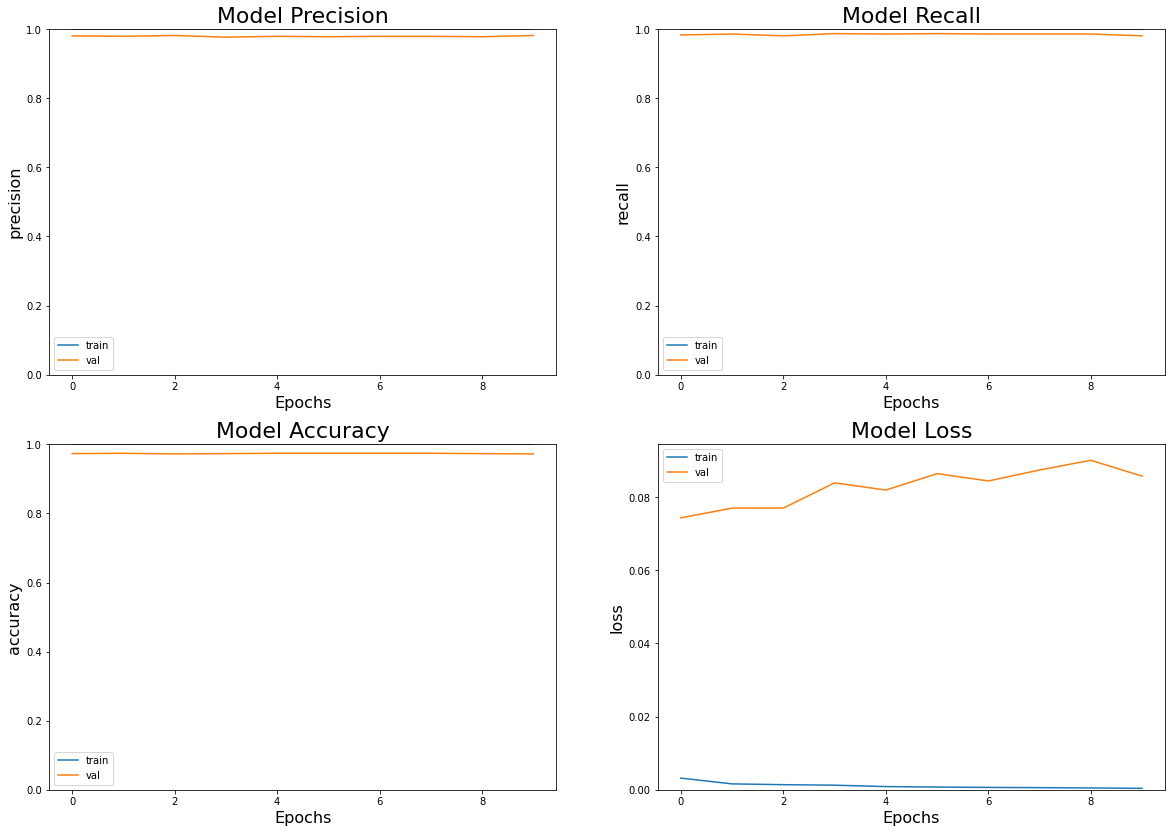

In [ ]:
plotting_visualizations(base_result)

Based on the 

### 7.2 Tuned Baseline Model

## Challenging the Solution

A transfer learning model was selected to challenge the final model. VGG19 was created by Oxford, and has 19 layers. (224)

In [ ]:
# insantiating the model

vgg_model = tf.keras.applications.VGG19(weights='imagenet', 
                                        include_top = False,
                                        input_shape = input_shape)



In [ ]:
# freezing the layers

for layer in vgg_model.layers:
    layer.trainable=False

In [ ]:
# adding layers

x = vgg_model.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(128,activation='relu')(x)
# output layer
predictions = tf.keras.layers.Dense(1,activation='sigmoid')(x)

model = tf.keras.Model(inputs=vgg_model.input, outputs=predictions)

In [ ]:
# to avoid overfitting

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss',patience=8)

In [ ]:
# Compiling the model

model.compile(loss='binary_crossentropy', 
              optimizer='adam',
              metrics=[tf.keras.metrics.Recall(name = 'recall'), 
                       tf.keras.metrics.Precision(name = 'precision'), 
                       'accuracy'])

In [ ]:
# fitting the model

vgg_start = time.time()

vgg_results = model.fit(train_images ,
                        train_labels,
                        epochs=10, 
                        validation_split = 0.2, 
                        steps_per_epoch=100,
                        callbacks=[early_stopping,lr],
                        batch_size=32)

vgg_stop = time.time()
print(f'Time taken to fit the VGG model was {round(vgg_stop - vgg_start, 3)} seconds')

Epoch 1/10
100/100 [==============================] - 15s 136ms/step - loss: 0.3422 - recall: 0.9698 - precision: 0.8517 - accuracy: 0.8516 - val_loss: 0.2427 - val_recall: 0.9558 - val_precision: 0.9165 - val_accuracy: 0.9034 - lr: 0.0010
Epoch 2/10
100/100 [==============================] - 13s 133ms/step - loss: 0.1956 - recall: 0.9599 - precision: 0.9449 - accuracy: 0.9279 - val_loss: 0.2000 - val_recall: 0.9675 - val_precision: 0.9300 - val_accuracy: 0.9226 - lr: 0.0010
Epoch 3/10
100/100 [==============================] - 14s 136ms/step - loss: 0.1781 - recall: 0.9610 - precision: 0.9427 - accuracy: 0.9279 - val_loss: 0.1696 - val_recall: 0.9532 - val_precision: 0.9582 - val_accuracy: 0.9350 - lr: 0.0010
Epoch 4/10
100/100 [==============================] - 14s 137ms/step - loss: 0.1452 - recall: 0.9659 - precision: 0.9578 - accuracy: 0.9429 - val_loss: 0.1512 - val_recall: 0.9636 - val_precision: 0.9598 - val_accuracy: 0.9436 - lr: 0.0010
Epoch 5/10
100/100 [====================

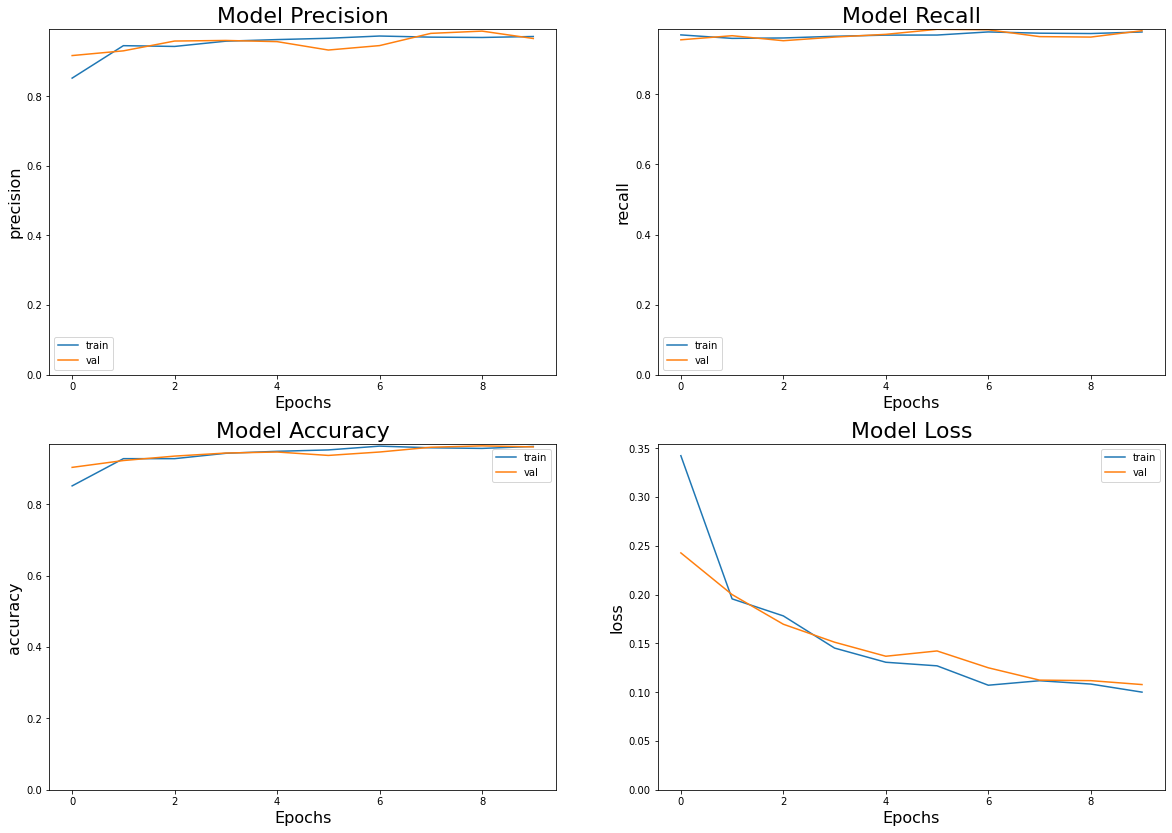

In [ ]:
plotting_visualizations(vgg_results)